# K-mean-clustering


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import warnings as war
from IPython.display import display

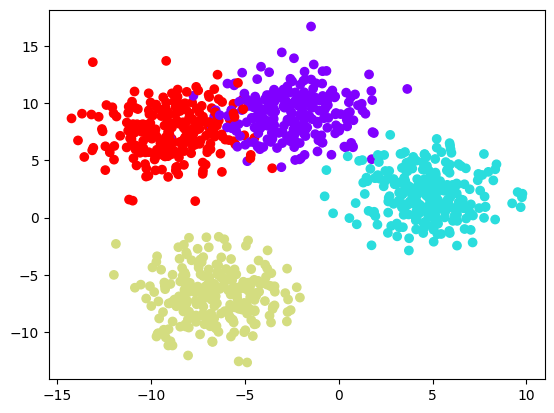

In [5]:
from sklearn.datasets import make_blobs

X, y = make_blobs(
    n_samples=1000,      
    n_features=2,       
    centers=4,          
    cluster_std=2.0,
    random_state=42
)

plt.scatter(X[:,0],X[:,1],c=y,cmap="rainbow")

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=10,shuffle=True,test_size=0.20)

scale = StandardScaler()
scale.fit(X)

X_train = scale.transform(X_train)
X_test = scale.transform(X_test)

In [17]:
from sklearn.cluster import KMeans

## Elbow method to select k values
wcss=[]

for k in range(1,20):
    
    kmean = KMeans(
        n_clusters=k,
        init="k-means++",
        n_init=10,
        max_iter=100
    )

    kmean.fit(X_train)
    wcss.append(kmean.inertia_)


In [18]:
print(wcss)

[1614.9329350042706, 900.521604085028, 300.80836256794083, 163.88756371691653, 144.56608408191067, 130.34111918567407, 115.99103451408568, 105.52857335227543, 95.24282704588558, 87.36371240667023, 79.1556357923761, 70.78580726048291, 66.26049772652317, 61.67208766408515, 58.73500425706325, 55.76372903754862, 52.01933796557992, 49.477409081687114, 47.12485770968989]


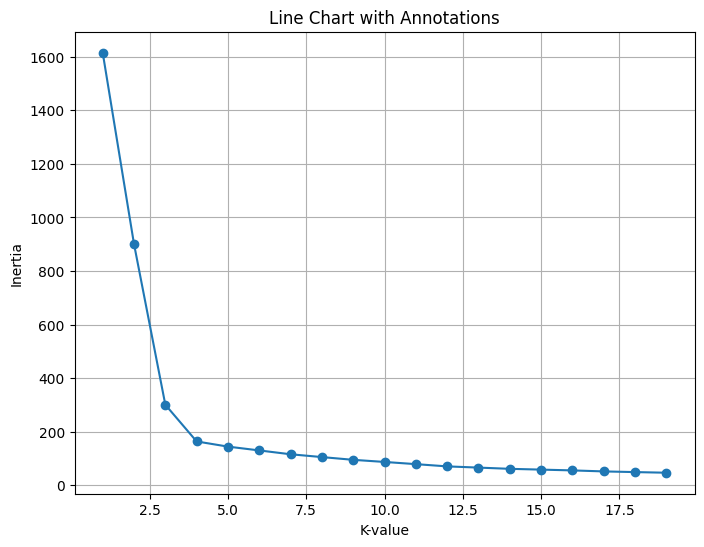

In [22]:
x=[val for val in range (1,20)]
y=wcss
plt.figure(figsize=(8, 6))
plt.plot(x, y, marker='o', linestyle='-')
plt.title('Line Chart with Annotations')
plt.xlabel('K-value')
plt.ylabel('Inertia')

plt.grid(True)
plt.show()

In [42]:
from sklearn.metrics import silhouette_score
def create_cluster(k):
    kmean = KMeans(
        n_clusters=k,
        init="k-means++",
        n_init=10,
        max_iter=100
    )

    kmean.fit(X_train) ## fitting the model with X_train
    y_pred = kmean.predict(X_train) ## now based on the centroids it assign tthe training points to different classes

    plt.scatter(X_train[:,0],X_train[:,1],c=y_pred,cmap="rainbow")

    print("score= ",silhouette_score(X_train,labels=y_pred))

    ## here the train and test boht are done on same data. 

score=  0.6297222830731584


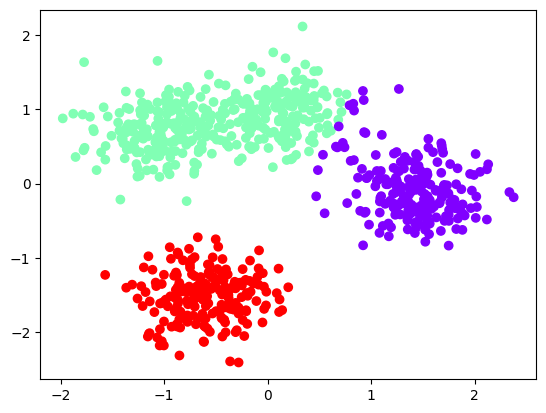

In [44]:
create_cluster(3)

In [ ]:
# y_trans  = kmean.transform(X_train) ## just provide the distance of the point to different centroids
# print(y_trans)

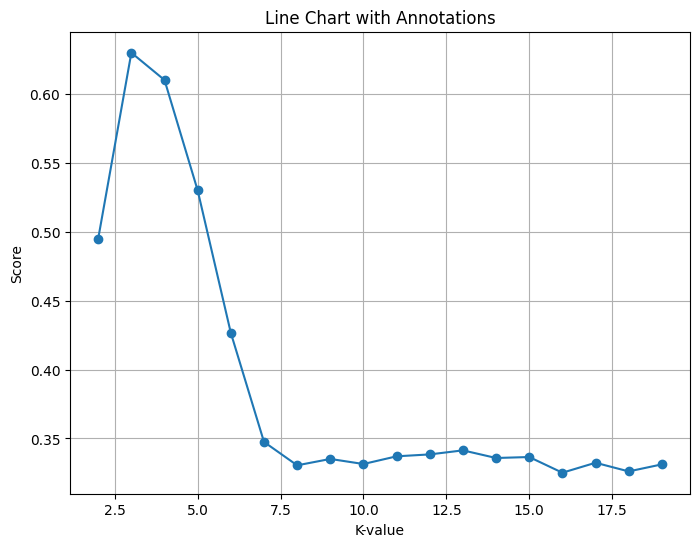

In [36]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

score=[]

for k in range(2,20):
    
    kmean = KMeans(
        n_clusters=k,
        init="k-means++",
        n_init=10,
        max_iter=100
    )

    kmean.fit(X_train)
    y_pred = kmean.predict(X_train)

    score.append(silhouette_score(X_train,labels=y_pred))

x=[val for val in range (2,20)]
y=score
plt.figure(figsize=(8, 6))
plt.plot(x, y, marker='o', linestyle='-')
plt.title('Line Chart with Annotations')
plt.xlabel('K-value')
plt.ylabel('Score')

plt.grid(True)
plt.show()


In [37]:
print(score)

[0.494951991550278, 0.6297222830731584, 0.6099160456663926, 0.5298719203473677, 0.42655753978322297, 0.3475133952380511, 0.33053089177812095, 0.33515787618244886, 0.33148403853643754, 0.33707038601814004, 0.33844857982912013, 0.3413883657439731, 0.3358511282326661, 0.336552002681741, 0.32517211968406706, 0.33240659403656125, 0.3261234400512521, 0.33122072435319533]
